# Introduction à l'ANOVA et l'Analyse de sensibilité

## Objectif
Ce notebook vise à illustrer la mise en oeuvre de l'ANOVA et de l'Analyse de sensibilité avec OpenTURNS.

Il présente aussi les données d'un cas test de signature EM de corps sur lequel on peut tester différents métamodèles.

## Import modules et data

In [1]:
import pandas as pd

In [2]:
import numpy as np

On commence par charger les données qui sont dans un fichier .csv avec comme séparateur un ;
Elles sont déjà normalisées

In [3]:
file_name="data_scaled.csv"
xy_tot=pd.read_csv(file_name,header=0,sep=';')
xy_tot.describe()

,Logive,Rnez,Lfente,Pfente,Dengin,LBB,Pos,Fleche_BA,Fleche_BF,Corde,H,y
count,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,1.110000e+02
mean,0.497335,0.499360,0.498114,0.500438,0.497902,0.502162,0.496423,0.503372,0.500216,0.500145,0.503438,2.560514e-16
std,0.291364,0.294132,0.291572,0.290533,0.293118,0.290416,0.292513,0.290781,0.293343,0.290855,0.290823,1.469217e+01
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-3.151231e+01
25%,0.249340,0.248046,0.251255,0.254569,0.245518,0.259067,0.244946,0.257116,0.250675,0.255086,0.258540,-1.085429e+01
50%,0.495338,0.501609,0.497895,0.500335,0.498257,0.501992,0.497005,0.503145,0.500258,0.500010,0.504185,2.812443e-01
75%,0.742680,0.750742,0.749488,0.748856,0.749841,0.745628,0.745938,0.750699,0.751053,0.744964,0.751018,1.167499e+01
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.857436e+01


Visualisation

In [4]:
print(xy_tot)

       Logive      Rnez    Lfente    Pfente    Dengin       LBB       Pos  \
0    0.495338  0.000000  0.497895  0.500335  0.498257  0.501992  0.000000   
1    0.839713  0.797224  0.544219  0.117688  0.386605  0.936888  0.859441   
2    0.718764  0.462412  0.122786  0.000000  0.148126  0.284999  0.572958   
3    0.232614  0.964583  0.208857  0.493698  0.087776  0.514571  0.915970   
4    0.328525  0.360263  0.771815  0.737518  0.032510  0.805642  0.444953   
5    0.115392  0.806505  0.539120  0.338852  0.657285  0.818903  0.985513   
6    0.926719  0.652285  0.798143  0.929660  0.591207  0.783432  0.497005   
7    0.715883  0.747846  0.257191  0.405066  0.204779  0.790137  0.153351   
8    0.072779  0.420483  0.282936  0.561204  0.715837  0.892136  0.664640   
9    0.545483  0.765949  0.323389  0.805734  0.706332  0.363896  0.959004   
10   0.023926  0.721776  0.646024  0.433742  0.513990  0.264178  0.628038   
11   0.106651  0.821900  0.757006  0.242379  0.722840  0.205118  0.179186   

Pour voir le format des données

In [5]:
xy_tot.shape

(111, 12)

## ANOVA

In [6]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [7]:
results = ols('y ~ Logive+Rnez+Lfente+Pfente+Dengin+LBB+Pos+Fleche_BA+Fleche_BF+Corde+H', data=xy_tot).fit()

In [8]:
aov_table = sm.stats.anova_lm(results, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
Logive,812.660368,1.0,63.855565,2.509619e-12
Rnez,13.164762,1.0,1.034434,3.115987e-01
Lfente,4.514731,1.0,0.354749,5.527961e-01
Pfente,2.129187,1.0,0.167303,6.834035e-01
Dengin,104.841788,1.0,8.238044,5.016189e-03
LBB,11212.193305,1.0,881.008803,4.402781e-51
Pos,144.443696,1.0,11.349801,1.076363e-03
Fleche_BA,1494.859576,1.0,117.460020,1.640449e-18
Fleche_BF,166.712389,1.0,13.099585,4.674632e-04
Corde,2209.664849,1.0,173.626527,1.666877e-23


## Métamodèles

**Modèle de type régression linéaire**

On sépare input et sortie y

In [9]:
y_tot= xy_tot.pop('y').values

In [10]:
y_tot.shape

(111,)

In [11]:
xy_tot.shape

(111, 11)

In [12]:
import sklearn.linear_model as lm
linreg = lm.LinearRegression()

Il faut un vecteur de type (111,1) pour l'apprentissage, on fait un reshape

In [13]:
y_tot=y_tot.reshape(111,1)

In [14]:
lr=linreg.fit(xy_tot, y_tot)

In [15]:
lr.coef_

array([[  9.33313115,   1.17703508,   0.69515402,  -0.47904674,
         -3.33203568,  34.78401512,  -3.92077723, -12.68096741,
          4.20129498,  15.42001942,  25.67852894]])

In [16]:
linreg.score(xy_tot,y_tot)

0.9469383114183838

Tracés

In [17]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


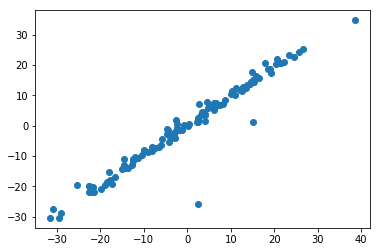

In [18]:
plt.plot(y_tot,lr.predict(xy_tot),'o')

**Modèle de type MLP**

On sépare les données entre apprentissage et test (20%)

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
x_train, x_test, y_train, y_test = train_test_split(xy_tot, y_tot, test_size=0.2)

In [21]:
from sklearn.neural_network import MLPRegressor

In [22]:
nnet=MLPRegressor(hidden_layer_sizes=(11,),max_iter=5000,activation='tanh',alpha=0.05,solver='lbfgs')

In [23]:
y_train=y_train.reshape(88,)

In [24]:
y_test=y_test.reshape(23,)

In [25]:
nnet.fit(x_train,y_train)

MLPRegressor(activation='tanh', alpha=0.05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(11,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=5000, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='lbfgs', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [26]:
y_pred=nnet.predict(x_test)

In [27]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


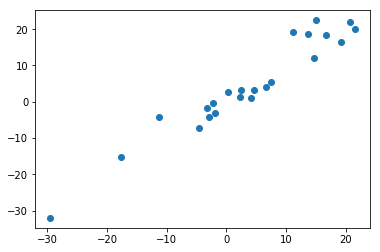

In [28]:
plt.plot(y_test, y_pred,'o')

Calcul du coefficient de détermination R2

In [29]:
from sklearn.metrics import r2_score

In [30]:
r2_score(y_test,y_pred)

0.9204736761218629

**Exercice 1** : Tester avec d'autres paramètres

**Exercice 2** : Tester d'autres métamodèles

## Analyse de sensibilité

Nous allons utiliser OpenTURNS et les 3 composantes de l'ACP

In [3]:
import openturns as ot

In [4]:
file_name="data_scaled2.csv"
xy_tot=pd.read_csv(file_name,header=0,sep=';')
xy_tot.describe()

,Logive,Rnez,Lfente,Pfente,Dengin,LBB,Pos,Fleche_BA,Fleche_BF,Corde,H,y1,y2,y3
count,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,1.110000e+02,1.110000e+02,1.110000e+02
mean,0.497335,0.499360,0.498114,0.500438,0.497902,0.502162,0.496423,0.503372,0.500216,0.500145,0.503438,2.560514e-16,6.621330e-16,1.720346e-16
std,0.291364,0.294132,0.291572,0.290533,0.293118,0.290416,0.292513,0.290781,0.293343,0.290855,0.290823,1.469217e+01,1.172201e+01,3.007738e+00
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-3.151231e+01,-2.468260e+01,-5.644749e+00
25%,0.249340,0.248046,0.251255,0.254569,0.245518,0.259067,0.244946,0.257116,0.250675,0.255086,0.258540,-1.085429e+01,-8.704975e+00,-2.317673e+00
50%,0.495338,0.501609,0.497895,0.500335,0.498257,0.501992,0.497005,0.503145,0.500258,0.500010,0.504185,2.812443e-01,-2.277762e-01,7.869673e-02
75%,0.742680,0.750742,0.749488,0.748856,0.749841,0.745628,0.745938,0.750699,0.751053,0.744964,0.751018,1.167499e+01,9.396469e+00,2.829186e+00
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.857436e+01,2.597075e+01,7.005887e+00


On extrait les 3 sorties, à savoir les valeurs sur les 3 premières composantes de l'ACP

In [5]:
y_tot = pd.concat([xy_tot.pop(x) for x in ['y1', 'y2','y3']], 1)
y_tot

,y1,y2,y3
0,15.082215,-5.248569,0.048376
1,14.428133,17.671144,1.892574
2,13.639695,-23.445469,1.156799
3,-14.621491,0.000358,4.929759
4,15.061054,1.235525,4.753541
5,25.807668,-9.829462,-3.863466
6,23.531258,10.713016,-2.285297
7,6.219236,16.677622,3.517117
8,-8.030760,19.209484,-0.108838
9,3.667738,-12.163948,-2.651874


On génère des points d'échantillonnages suivant une distribution uniforme indépendante pour chaque variable - Les variables d'entrée du dataset sont normalisées entre 0 et 1

In [6]:
distribution = ot.ComposedDistribution([ot.Uniform(0.0, 1.0)] * 11)
dimension = distribution.getDimension()
distribution.setDescription(["Logive", "Rnez", "Lfente", "Pfente", "Dengin", "LBB", "Pos","Fleche_BA", "Fleche_BF", "Corde", "H"])

In [7]:
ot.RandomGenerator.SetSeed(0)
size = 10000
inputDesign = ot.SobolIndicesExperiment(distribution, size, False).generate()
inputDesign.getSize()

130000

**Explication cf site OpenTURNS** : Sensitivity algorithms rely on the definition of specific designs. The method generates designs that can be used for Saltelli, Jansen, Martinez and MauntzKucherenko methods. This precomputes such input designs using distribution or experiment by generating a MC sample of twice the dimension by duplicating the distribution into a 2d distribution with repeated marginals, in order to also work with non-iid samples such as those generated by LHSExperiment or LowDiscrepancyExperiment. The sampling is done according to the given experiment, then it is split into samples A and B and the columns of these ones are mixed to define the huge sample (design). If computeSecondOrder is set to False, the result design is of size N(d+2) where d is the dimension of the distribution. If computeSecondOrder is set to True, the design size is N(2d+2).


=> Input pour pick and freeze

On va calculer les indices en s'appuyant sur un métamodèle pour calculer les valeurs sur les points d'échantillonnage - ici modèle linéaire **avec interactions**

In [8]:
import sklearn.linear_model as lm
from sklearn.preprocessing import PolynomialFeatures

In [9]:
interaction = PolynomialFeatures(degree=2, include_bias=False, interaction_only=True)
X_inter = interaction.fit_transform(xy_tot)

**On fitte un modèle linéaire avec interactions par composante**

In [10]:
linreg1 = lm.LinearRegression()
linreg1.fit(X_inter, y_tot['y1'])
linreg2 = lm.LinearRegression()
linreg2.fit(X_inter, y_tot['y2'])
linreg3 = lm.LinearRegression()
linreg3.fit(X_inter, y_tot['y3'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

On vérifie la qualité des métamodèles

Populating the interactive namespace from numpy and matplotlib


D:\slefebvr\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['size']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


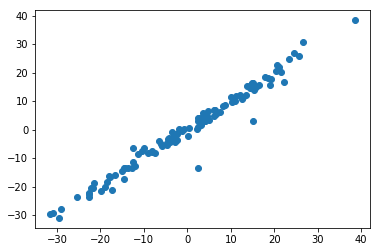

In [11]:
import matplotlib.pyplot as plt
%pylab inline
plt.plot(y_tot['y1'],linreg1.predict(X_inter),'o')

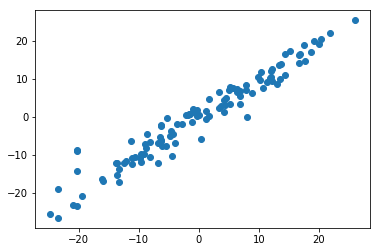

In [12]:
plt.plot(y_tot['y2'],linreg2.predict(X_inter),'o')

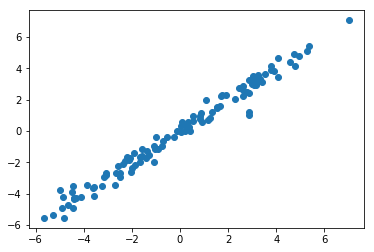

In [13]:
plt.plot(y_tot['y3'],linreg3.predict(X_inter),'o')

In [14]:
linreg1.score(X_inter,y_tot['y1'])

0.970523264402092

In [15]:
linreg2.score(X_inter,y_tot['y2'])

0.9407882932205576

In [16]:
linreg3.score(X_inter,y_tot['y3'])

0.9790872580655986

**On calcule les valeurs prédites pour les points d'échantillonnage**

In [17]:
inputDesignb = interaction.fit_transform(inputDesign)

In [18]:
outputDesign=np.zeros((np.shape(inputDesignb)[0],3))
outputDesign[:,0] = linreg1.predict(inputDesignb)
outputDesign[:,1] = linreg2.predict(inputDesignb)
outputDesign[:,2] = linreg3.predict(inputDesignb)

In [19]:
outputDesign1=ot.Sample(outputDesign)

**On calcule les indices de sensibilité principaux et totaux et les IC associés avec méthode de Martinez pour la première composante**

In [20]:
ot.RandomGenerator.SetSeed(0)
size = 10000
inputDesign = ot.SobolIndicesExperiment(distribution, size, False).generate()

In [21]:
sensitivityAnalysis = ot.MartinezSensitivityAlgorithm(inputDesign, outputDesign1.getMarginal([0]), size)
first_indice = sensitivityAnalysis.getFirstOrderIndices()
total_indice = sensitivityAnalysis.getTotalOrderIndices()
first_indiceIC = sensitivityAnalysis.getFirstOrderIndicesInterval()
total_indiceIC = sensitivityAnalysis.getTotalOrderIndicesInterval()


In [51]:
print(first_indice)
print(total_indice)
print(first_indiceIC)
print(total_indiceIC)

[0.022531,-0.014248,-0.0140205,-0.0133593,-0.0112318,0.473554,-0.00514327,0.053375,-0.00422653,0.0730302,0.261011]#11
[0.0447973,0.0156877,0.00125672,0.00597272,0.00910463,0.491434,0.0130709,0.0731795,0.0187353,0.102983,0.282423]#11
[-0.000233452, 0.0461605]
[-0.0367245, 0.00939048]
[-0.0367918, 0.00911211]
[-0.035165, 0.00948617]
[-0.0339717, 0.0121772]
[0.458676, 0.486185]
[-0.0286338, 0.0180825]
[0.0299223, 0.0753763]
[-0.0279425, 0.0196564]
[0.0484278, 0.0971254]
[0.239584, 0.281736]
[0.0128929, 0.075024]
[-0.0159514, 0.0452715]
[-0.0298046, 0.0304058]
[-0.0251899, 0.0352313]
[-0.0223945, 0.0387036]
[0.450296, 0.53096]
[-0.018276, 0.0426964]
[0.0395589, 0.103404]
[-0.0126653, 0.048192]
[0.0692628, 0.134671]
[0.243399, 0.31973]


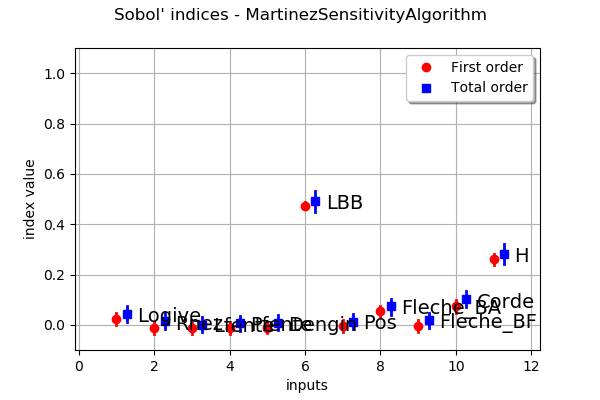

In [52]:
sensitivityAnalysis.draw()

Analyse par composante

In [ ]:
for j in range(1,3):
    sensitivityAnalysisb = ot.MartinezSensitivityAlgorithm(inputDesign, outputDesign1.getMarginal([j]), size)
    bb = sensitivityAnalysisb.getFirstOrderIndices()
    tt = sensitivityAnalysisb.getTotalOrderIndices()
    first_indice=np.vstack((first_indice,bb))
    total_indice=np.vstack((total_indice,tt))


Tracés

In [ ]:
variables = ["Logive", "Rnez", "Lfente", "Pfente", "Dengin", "LBB", "Pos","Fleche_BA", "Fleche_BF", "Corde", "H"]
xxx = np.arange(len(variables))  # the label locations
width = 0.2  # the width of the bars


In [ ]:
fig, ax = plt.subplots()
rects1 = ax.bar(xxx - width, first_indice[0,:], width, color='red',label='Composante1')
rects2 = ax.bar(xxx , first_indice[1,:], width, color='blue',label='Composante2')
rects3 = ax.bar(xxx + width, first_indice[2,:], width, color='green',label='Composante3')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Indices Principaux')
ax.set_xticks(xxx)
ax.set_xticklabels(variables)
ax.legend()

In [ ]:
fig, ax = plt.subplots()
rects1 = ax.bar(xxx - width, total_indice[0,:], width, color='red',label='Composante1')
rects2 = ax.bar(xxx , total_indice[1,:], width, color='blue',label='Composante2')
rects3 = ax.bar(xxx + width, total_indice[2,:], width, color='green',label='Composante3')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Indices Totaux')
ax.set_xticks(xxx)
ax.set_xticklabels(variables)
ax.legend()

**Analyse globale des 3 composantes**

In [ ]:
sensitivity_algorithm = ot.MartinezSensitivityAlgorithm(inputDesign, outputDesign1, size)

In [ ]:
first_indiceag = sensitivity_algorithm.getAggregatedFirstOrderIndices()
total_indiceag = sensitivity_algorithm.getAggregatedTotalOrderIndices()
print(first_indiceag)
print(total_indiceag)

Calcul d'intervalles de confiance par bootstrap

In [ ]:
nr_bootstrap = 100
confidence_level = 0.95

sensitivity_algorithm.setBootstrapSize(nr_bootstrap)
sensitivity_algorithm.setConfidenceLevel(confidence_level)
sensitivity_algorithm.setUseAsymptoticDistribution(False)
interval_fo = sensitivity_algorithm.getFirstOrderIndicesInterval()
interval_to = sensitivity_algorithm.getTotalOrderIndicesInterval()
print("bootstrap intervals")
print("Aggregated first order indices interval = ", interval_fo)
print("Aggregated total order indices interval = ", interval_to)

Plot

In [ ]:
graph = sensitivity_algorithm.draw()
graph